In [1]:
%matplotlib inline

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')


In [4]:
df = pd.read_csv("all_file_stats.csv")

In [6]:
df.shape

(513, 14)

In [8]:
df.head()   # all CpGs == total_cpg_no_filter

,filename,methylation,PDR_total,methylation_unweighted,PDR_unweighted,thisMeth,mixedReadCount,total_reads,type,bio,protocol,total_cpg_no_filter,total_cpg_gtrthan1,total_cpg_gtrthan38
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,0.591346,0.259001,0.691996,0.254835,7033858.0,3080732.0,11894660.0,normal,normal_B,normal_B_cell_A1_24,147675.0,147599.0,122481.0
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.531169,0.411448,0.620106,0.390562,1989048.0,1540734.0,3744659.0,normal,normal_B,normal_B_cell_A1_24,69078.0,69058.0,57061.0
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,0.586403,0.278568,0.699736,0.266418,6134873.0,2914341.0,10461874.0,normal,normal_B,normal_B_cell_A1_24,151692.0,151636.0,125516.0
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,0.384385,0.763173,0.265385,8694.0,5401.0,14051.0,normal,normal_B,normal_B_cell_A1_24,8843.0,8843.0,7124.0
4,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,0.628623,0.248006,0.732036,0.240201,13784911.0,5438461.0,21928743.0,normal,normal_B,normal_B_cell_A1_24,234318.0,234229.0,193915.0


In [33]:
#
# remove all "2cell" files
#
# index 498-----RRBS_trito_pool_2_CGTACTAG.CCCGGG
# index 502-----RRBS_trito_pool_2_CGTACTAG.CTCAGC
#
df = df.drop([498, 502])

In [34]:
unfiltered_all = df

In [35]:
unfiltered_all.shape

(511, 14)

In [ ]:
#
# y-axis: # of cells with sum total CpG count, x-axis is range of sum total CpG counts per file
#

In [36]:
unfiltered_all2 = unfiltered_all.loc[:,['total_cpg_no_filter']]
unfiltered_all2 = unfiltered_all2.reset_index(drop=True)

In [37]:
unfiltered_all2.shape

(511, 1)

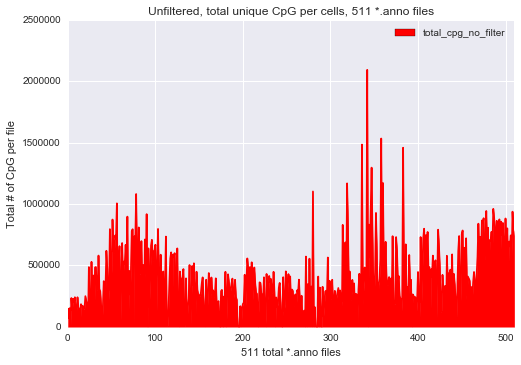

In [73]:
unfiltered_all2.plot(kind='area', color='r')
plt.title('Unfiltered, total unique CpG per cells, 511 *.anno files')
plt.xlabel('511 total *.anno files') 
plt.ylabel('Total # of CpG per file')

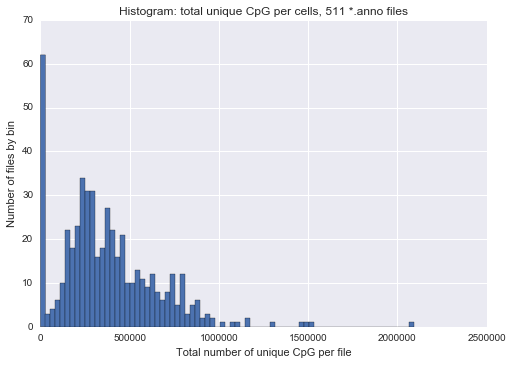

In [64]:
plt.hist(unfiltered_all2['total_cpg_no_filter'], bins=75)
plt.title("Histogram: total unique CpG per cells, 511 *.anno files")
plt.ylabel("Number of files by bin")
plt.xlabel("Total number of unique CpG per file")

In [65]:
filtered1 = unfiltered_all2[unfiltered_all2["total_cpg_no_filter"]>100000]

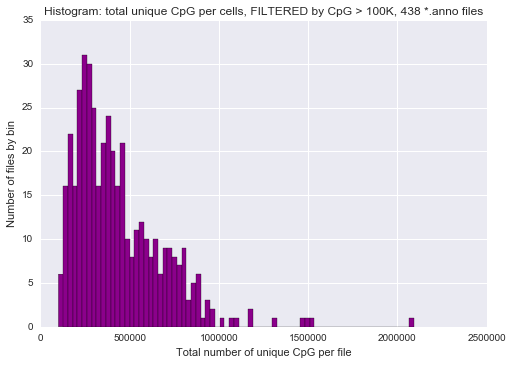

In [66]:
plt.hist(filtered1['total_cpg_no_filter'], bins=75, color='darkmagenta')
plt.title("Histogram: total unique CpG per cells, FILTERED by CpG > 100K, 438 *.anno files")
plt.ylabel("Number of files by bin")
plt.xlabel("Total number of unique CpG per file")

In [67]:
filtered2 = unfiltered_all2[unfiltered_all2["total_cpg_no_filter"]>80000]

In [69]:
len(filtered2)  # a difference of four files

442

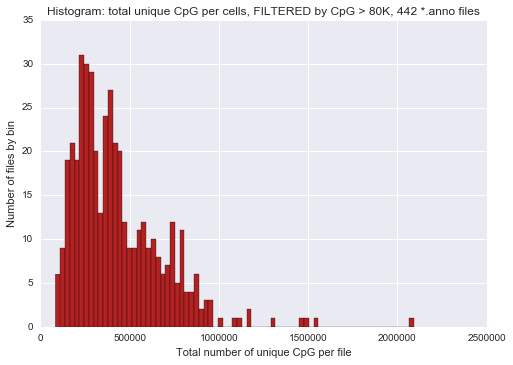

In [74]:
plt.hist(filtered2['total_cpg_no_filter'], bins=75, color='firebrick')
plt.title("Histogram: total unique CpG per cells, FILTERED by CpG > 80K, 442 *.anno files")
plt.ylabel("Number of files by bin")
plt.xlabel("Total number of unique CpG per file")

In [91]:
#
# List the four files difference between these two filters, >100K vs >80K
#
filtered438 = df[df["total_cpg_no_filter"] > 100000]
filtered442 = df[df["total_cpg_no_filter"] > 80000]

print(filtered438.shape)
print(filtered442.shape)

filtered442[(~filtered442.filename.isin(filtered438.filename))]

(438, 14)
(442, 14)


,filename,methylation,PDR_total,methylation_unweighted,PDR_unweighted,thisMeth,mixedReadCount,total_reads,type,bio,protocol,total_cpg_no_filter,total_cpg_gtrthan1,total_cpg_gtrthan38
159,RRBS_NormalBCD19pCD27mcell23_44_GTAGAGGA.ACCGCG,0.450554,0.177824,0.586210,0.175492,346652.0,136816.0,769390.0,normal,CD19CD27m,NormalBCD19pCD27mcell23_44,95398.0,95393.0,80025.0
225,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG,0.417533,0.308561,0.525005,0.317133,376315.0,278101.0,901283.0,normal,CD19CD27p,NormalBCD19pCD27pcell1_22_,88590.0,88584.0,73436.0
292,RRBS_NormalBCD19pCD27pcell67_88_GCTACGCT.ACCGCG,0.452662,0.298460,0.561306,0.304930,538864.0,355297.0,1190433.0,normal,CD19CD27p,NormalBCD19pCD27pcell67_88,84355.0,84343.0,69548.0
398,RRBS_NormalBCD19pcell67_88_TCCTGAGC.GTTGAG,0.394685,0.166073,0.535144,0.168153,315587.0,132791.0,799593.0,normal,CD19p,RRBS_NormalBCD19pcell67_88,91467.0,91461.0,78199.0


In [92]:
filtered3 = unfiltered_all2[unfiltered_all2["total_cpg_no_filter"]>75000]

In [93]:
len(filtered3)

443

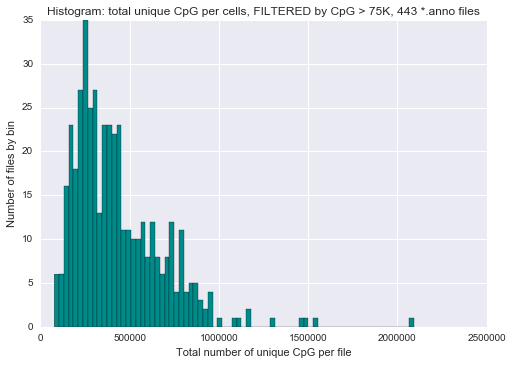

In [94]:
plt.hist(filtered3['total_cpg_no_filter'], bins=75, color='darkcyan')
plt.title("Histogram: total unique CpG per cells, FILTERED by CpG > 75K, 443 *.anno files")
plt.ylabel("Number of files by bin")
plt.xlabel("Total number of unique CpG per file")

In [95]:
#
# List the 5 files difference between these two filters, >100K vs >80K
#

filtered438 = df[df["total_cpg_no_filter"] > 100000]
filtered443 = df[df["total_cpg_no_filter"] > 75000]

print(filtered438.shape)
print(filtered443.shape)

filtered443[(~filtered443.filename.isin(filtered438.filename))]

(438, 14)
(443, 14)


,filename,methylation,PDR_total,methylation_unweighted,PDR_unweighted,thisMeth,mixedReadCount,total_reads,type,bio,protocol,total_cpg_no_filter,total_cpg_gtrthan1,total_cpg_gtrthan38
159,RRBS_NormalBCD19pCD27mcell23_44_GTAGAGGA.ACCGCG,0.450554,0.177824,0.586210,0.175492,346652.0,136816.0,769390.0,normal,CD19CD27m,NormalBCD19pCD27mcell23_44,95398.0,95393.0,80025.0
225,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG,0.417533,0.308561,0.525005,0.317133,376315.0,278101.0,901283.0,normal,CD19CD27p,NormalBCD19pCD27pcell1_22_,88590.0,88584.0,73436.0
292,RRBS_NormalBCD19pCD27pcell67_88_GCTACGCT.ACCGCG,0.452662,0.298460,0.561306,0.304930,538864.0,355297.0,1190433.0,normal,CD19CD27p,NormalBCD19pCD27pcell67_88,84355.0,84343.0,69548.0
398,RRBS_NormalBCD19pcell67_88_TCCTGAGC.GTTGAG,0.394685,0.166073,0.535144,0.168153,315587.0,132791.0,799593.0,normal,CD19p,RRBS_NormalBCD19pcell67_88,91467.0,91461.0,78199.0
444,RRBS_cw154_Tris_protease_CTCTCTAC.TAGCGG,0.500082,0.420654,0.596881,0.386584,711059.0,598122.0,1421886.0,CLL,CLL,cw154_Tris_protease,77891.0,77882.0,65323.0


In [98]:
filtered4 = unfiltered_all2[unfiltered_all2["total_cpg_no_filter"]>50000]

In [99]:
len(filtered4)

446

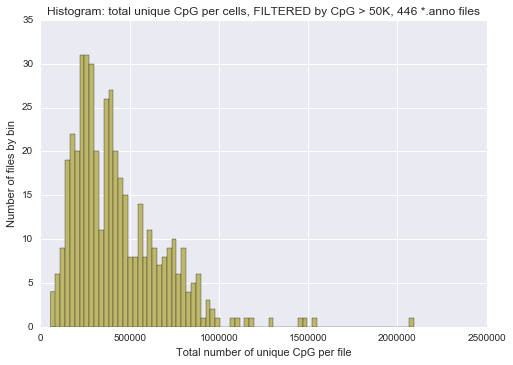

In [100]:
plt.hist(filtered4['total_cpg_no_filter'], bins=75, color='darkkhaki')
plt.title("Histogram: total unique CpG per cells, FILTERED by CpG > 50K, 446 *.anno files")
plt.ylabel("Number of files by bin")
plt.xlabel("Total number of unique CpG per file")

In [103]:
#
# List the 8 files difference between these two filters, >100K vs >50K
#


filtered438 = df[df["total_cpg_no_filter"] > 100000]
filtered446 = df[df["total_cpg_no_filter"] > 50000]

print(filtered438.shape)
print(filtered446.shape)

filtered446[(~filtered446.filename.isin(filtered438.filename))]

(438, 14)
(446, 14)


,filename,methylation,PDR_total,methylation_unweighted,PDR_unweighted,thisMeth,mixedReadCount,total_reads,type,bio,protocol,total_cpg_no_filter,total_cpg_gtrthan1,total_cpg_gtrthan38
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.531169,0.411448,0.620106,0.390562,1989048.0,1540734.0,3744659.0,normal,normal_B,normal_B_cell_A1_24,69078.0,69058.0,57061.0
126,RRBS_normal_B_cell_H1_22_TAGGCATG.CTCAGC,0.564256,0.300729,0.645135,0.284544,773682.0,412346.0,1371155.0,normal,normal_B,normal_B_cell_H1_22,72816.0,72799.0,60338.0
159,RRBS_NormalBCD19pCD27mcell23_44_GTAGAGGA.ACCGCG,0.450554,0.177824,0.586210,0.175492,346652.0,136816.0,769390.0,normal,CD19CD27m,NormalBCD19pCD27mcell23_44,95398.0,95393.0,80025.0
225,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG,0.417533,0.308561,0.525005,0.317133,376315.0,278101.0,901283.0,normal,CD19CD27p,NormalBCD19pCD27pcell1_22_,88590.0,88584.0,73436.0
292,RRBS_NormalBCD19pCD27pcell67_88_GCTACGCT.ACCGCG,0.452662,0.298460,0.561306,0.304930,538864.0,355297.0,1190433.0,normal,CD19CD27p,NormalBCD19pCD27pcell67_88,84355.0,84343.0,69548.0
398,RRBS_NormalBCD19pcell67_88_TCCTGAGC.GTTGAG,0.394685,0.166073,0.535144,0.168153,315587.0,132791.0,799593.0,normal,CD19p,RRBS_NormalBCD19pcell67_88,91467.0,91461.0,78199.0
444,RRBS_cw154_Tris_protease_CTCTCTAC.TAGCGG,0.500082,0.420654,0.596881,0.386584,711059.0,598122.0,1421886.0,CLL,CLL,cw154_Tris_protease,77891.0,77882.0,65323.0
448,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ACCGCG,0.537193,0.429048,0.628864,0.389734,400150.0,319594.0,744891.0,CLL,CLL,cw154_Tris_protease_GR,56706.0,56695.0,46212.0
